In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing

In [0]:
banking =  pd.read_csv('bank-full.csv',sep = ';')

In [0]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [0]:
banking.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [0]:
banking.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [0]:
banking.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [0]:
banking.shape

(45211, 17)

In [0]:
banking.rename(columns={"y":"Action"},inplace = True)

In [0]:
#banking.Action.value_counts()

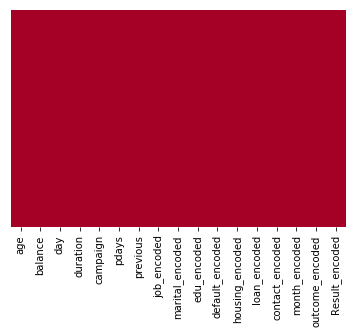

In [0]:
sns.heatmap(banking.isnull(),yticklabels = False, cbar = False , cmap ='RdYlGn')

In [0]:
new_data =  banking.select_dtypes(include='object')

In [0]:
#checking the number of uique categories in each column
for i in new_data.columns:
  print(i,';',len(new_data[i].unique()),'labels')

job ; 12 labels
marital ; 3 labels
education ; 4 labels
default ; 2 labels
housing ; 2 labels
loan ; 2 labels
contact ; 3 labels
month ; 12 labels
poutcome ; 4 labels
Action ; 2 labels


In [0]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data_encoded = new_data.apply(lb.fit_transform)
new_data_nonobject = banking.select_dtypes(exclude = ["object"])
banking1 = pd.concat([new_data_nonobject,new_data_encoded], axis = 1)

In [0]:
banking1.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Action
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [0]:
banking1.shape

(45211, 17)

In [0]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2 
from sklearn.feature_selection import f_classif

In [0]:

X = banking.iloc[:,0:16]
y = banking['Result_encoded']

In [0]:
X.shape

(45211, 16)

In [0]:
Kbest = SelectKBest(score_func = f_classif , k = 12)
kfit = Kbest.fit(X,y)

In [0]:
scores = pd.DataFrame(kfit.scores_)
columns = pd.DataFrame(X.columns)

In [0]:
FeatureScores = pd.concat([columns,scores],axis = 1)
FeatureScores.columns = ['feature','Score']

In [0]:
FeatureScores

,feature,Score
0,age,28.625233
1,balance,126.572276
2,day,36.359010
3,duration,8333.761148
4,campaign,243.358404
5,pdays,490.696563
6,previous,396.443989
7,job_encoded,74.048351
8,marital_encoded,94.150026
9,edu_encoded,199.242825


In [0]:
print(FeatureScores.nlargest(8,'Score'))

            feature        Score
3          duration  8333.761148
13  contact_encoded  1017.965930
11  housing_encoded   892.950576
5             pdays   490.696563
6          previous   396.443989
15  outcome_encoded   275.596872
4          campaign   243.358404
12     loan_encoded   211.167395


In [0]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


#The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
#F1 = 2 * (precision * recall) / (precision + recall)

#Recursive Feature Elimination. Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. 


In [0]:
X = banking1.iloc[:,0:16]
y = banking1.iloc[:,16]
logit = LogisticRegression()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 10)

In [0]:
rfe = RFE(estimator=logit, step=1)
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
cols = pd.DataFrame(X_train.columns)
ranking = pd.DataFrame(rfe.ranking_)

In [0]:
rankings_of_features = pd.concat([cols,ranking],axis = 1)

In [0]:
rankings_of_features

,0,0
0,age,4
1,balance,9
2,day,5
3,duration,7
4,campaign,1
5,pdays,8
6,previous,1
7,job,6
8,marital,1
9,education,1


In [0]:
rankings_of_features.columns = ['feature','rank']

In [0]:
rankings_of_features

,feature,rank
0,age,4
1,balance,9
2,day,5
3,duration,7
4,campaign,1
5,pdays,8
6,previous,1
7,job,6
8,marital,1
9,education,1


In [0]:
print(rankings_of_features.nlargest(5,'rank'))
#remember this gives wrong results

    feature  rank
1   balance     9
5     pdays     8
3  duration     7
7       job     6
2       day     5


In [0]:
rankings_of_features.sort_values(by='rank')

,feature,rank
4,campaign,1
6,previous,1
8,marital,1
9,education,1
10,default,1
11,housing,1
12,loan,1
13,contact,1
14,month,2
15,poutcome,3


In [0]:
#replace your X_train,X_test with new training data(the one which contains most impactful features)
X_trainRFE = rfe.transform(X_train)
X_testRFE = rfe.transform(X_test)

In [0]:
model = logit.fit(X_trainRFE,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [0]:
logit.predict(X_testRFE)

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
score = logit.score(X_testRFE, y_test)
print(score)

0.8839812332439678


# RFE using cross validation

In [0]:
rfecv = RFECV(estimator=logit, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
rfecv.grid_scores_

array([0.88201116, 0.88201116, 0.88201116, 0.88201116, 0.88201116,
       0.88201116, 0.88201116, 0.8813509 , 0.88131788, 0.88151594,
       0.88144993, 0.88135087, 0.88541147, 0.88871275, 0.8895051 ,
       0.88917501])

In [0]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [0]:
model = logit.fit(X_train_rfecv,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logit.predict(X_test_rfecv)


array([0, 0, 0, ..., 0, 0, 0])

In [0]:
logit.score(X_test_rfecv,y_test)
print(score)

0.8839812332439678
